In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
from keras import models, optimizers, regularizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape= (150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))          

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_datagen = ImageDataGenerator( rescale=1./255 )

In [10]:
train_generator = train_datagen.flow_from_directory(
    './data/cats_and_dogs/train/',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    './data/cats_and_dogs/validation/',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
checkpoint = ModelCheckpoint(
    './models/perros_gatos.hdf5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True
)


In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(),
    metrics = ['accuracy']
)

In [13]:
hist = model.fit(
    train_generator,
    steps_per_epoch=2000//32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1000//32,
    callbacks=[checkpoint]
)

Epoch 1/100


2023-09-03 16:51:23.087765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-09-03 16:51:26.171800: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f99441a7d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-03 16:51:26.171838: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2023-09-03 16:51:26.175478: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-03 16:51:26.241994: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.4995
Epoch 1: val_accuracy improved from -inf to 0.59375, saving model to ./models/perros_gatos.hdf5
62/62 [==============================] - 37s 467ms/step - loss: 0.6959 - accuracy: 0.4995 - val_loss: 0.6918 - val_accuracy: 0.5938
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.5218
Epoch 2: val_accuracy did not improve from 0.59375
62/62 [==============================] - 17s 266ms/step - loss: 0.6952 - accuracy: 0.5218 - val_loss: 0.6929 - val_accuracy: 0.5060
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5056
Epoch 3: val_accuracy did not improve from 0.59375
62/62 [==============================] - 17s 274ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6916 - val_accuracy: 0.5776
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.5036
Epoch 4: val_accuracy did not improve from 0.59375
62/62 [==============================] - 17s 274ms/step - loss: 0.6941 - accuracy: 0.5036 - val_loss: 0.6925 - val_accuracy: 0.5091
Epoch 5/100
62/62 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5178
Epoch 5: val_accuracy did not improve from 0.59375
62/62 [=========================

In [15]:
import matplotlib.pyplot as plt

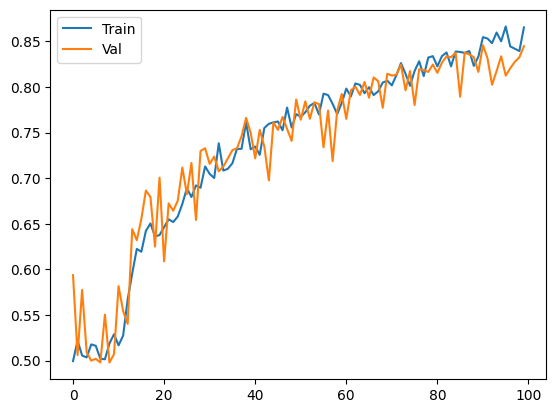

In [16]:
plt.plot(hist.history['accuracy'],label = 'Train')
plt.plot(hist.history['val_accuracy'],label = 'Val')
plt.legend()
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(
    './data/cats_and_dogs/test/',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [18]:
model2 = model

In [19]:
model2.load_weights('./models/perros_gatos.hdf5')

In [20]:
model2.evaluate(test_generator)

32/32 [==============================] - 8s 255ms/step - loss: 0.4260 - accuracy: 0.8160


[0.4259728789329529, 0.8159999847412109]